# Практическое задание по ОММ

### Выполнил студент 314 группы  Невский Дмитрий Владимирович
### Преподаватель: Боголюбов Николай Александрович
 

## Вариант 6

Задание выполнялось  в интерактивной среде Jupyter notebook

## Постановка задачи:
Используя схему бегущего счёта и итерационные методы решить задачу
    \begin{equation*}
        \begin{cases}
            \frac{\partial u}{\partial t}-(2\cdot u+t)\cdot\frac{\partial u}{\partial     x}=0\qquad -1<x<0),
            \\
            u(x;0)=1-x,
            \\
            u(0;t)=\frac{2-t^2}{4\cdot t+2}.
        \end{cases}
    \end{equation*}

*Построение характеристик*

В точках пересечения проекций его характеристик, решение будет разрывным. Посмотрим как будут вести себя проекции характеристик в заданных областях. Уравнение характеристик будет иметь вид:


$$\frac{dt}{1}=-\frac{dx}{2\cdot u+t}=\frac{du}{0}$$
А значит

\begin{equation*}
\begin{cases}
u=u(x_0;t_0))=const
\\
x-x_0=2\cdot u\cdot (t-t_0)+\frac{t^2-t_0^2}{2}
\end{cases}
\end{equation*}
Воспользуемся начальным и граничным условиями для получения двух семейств кривых:

$$ 1) \qquad t_0=0 \qquad x=x_0+2\cdot (1-x_0)\cdot t+\frac{t^2-t_0^2}{2} $$

$$ 2) \qquad x_0=0 \qquad x=2\cdot \frac{(2-t_0^2)}{(4\cdot t_0+2)}\cdot (t-t_0)+\frac{t^2-t_0^2}{2}$$

Импортируем необходимые библиотеки

<IPython.core.display.Javascript object>


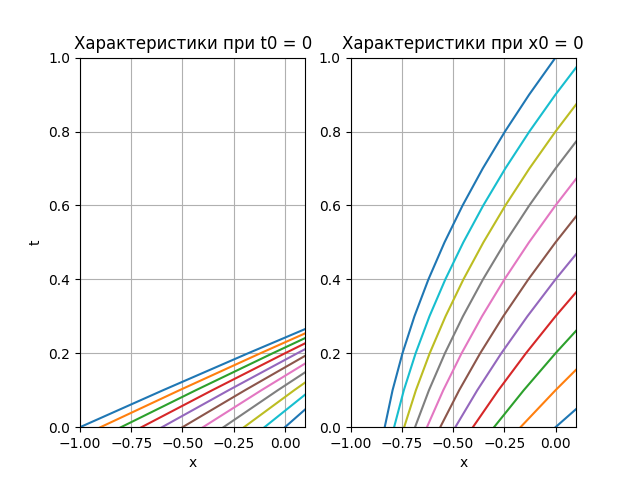

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def ch1(t):
    return [x0+2*(1-x0)*t+(t**2)/2 for x0 in np.arange(-1, 0.1, .1)]

def ch2(t):
    return [2*(2-t0**2)*(t-t0)/(2*(2*t0+1))+(t**2-t0**2)/2 for t0 in np.arange(0, 1.1, .1)]
t_list = np.arange(-1, 1.1, .1)


ch1_list = [ch1(t) for t in t_list]
ch2_list = [ch2(t) for t in t_list]


%matplotlib notebook
plt.subplot(1, 2, 1)
plt.ylim(0,1)
plt.xlim(-1,0.1)
plt.plot(ch1_list, t_list) 
plt.title('Характеристики при t0 = 0')
plt.ylabel('t')
plt.xlabel('x')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.ylim(0,1)
plt.xlim(-1,0.1)
plt.plot(ch2_list, t_list)
plt.title('Характеристики при x0 = 0')
plt.xlabel('x')
plt.grid(True)
plt.show()

Как видно на заданном отрезке [-1;0] характеристики не пересекаются.Также видно, что характеристики имеют параболическую зависимость x от t.

## Метод решения

 Введём в области  $  Ω = {(x,t):−1≤x≤0,0<t≤2} $ сетку с шагом h по x и шагом $ τ $ по t:
 \begin{equation*}
        \begin{cases} 
            x_n=n⋅h,h=\frac{−1}{N−1},n=\overline{0,N−1} 
            \\
            t_m=m⋅τ,τ=\frac{1}{M−1} ,m=\overline{0,M−1}
        \end{cases}
 \end{equation*}
 

На $ ω_{hx, ht} $ будем рассматривать сеточную функцию $ y_{n}^m=u(x_n,t_m) $

## Шаблон

Перепишем исходное уравнение, приведя его к дивергентному виду:
$$ \frac{\partial u}{\partial t}-\frac{\partial (u+t\cdot u)}{\partial t}=0 $$
Для рассматриваемой задачи будем использовать четырехточечный шаблон. Он безусловно устойчив и аппроксимирует задачу как $ O(h_x^2+h_t^2) $.

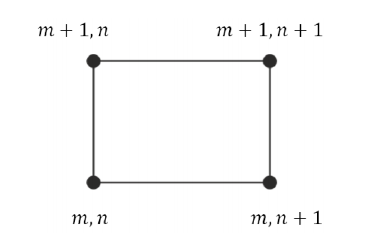

In [3]:
from IPython.display import Image
Image("1.png")

Таким образом, разностная схема задачи имеет вид: 
$$ \frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{2h_t} + \frac{(F^{m+1}_{n}) - (F^{m}_{n}) + (F^{m+1}_{n+1}) - (F^{m}_{n+1})}{2 \cdot 2h_x}=0 $$
Где $$ F_n^m = F(y_n^m) = (y_n^m+t*y_n^m)$$
При начальных условиях:
 \begin{equation*}
        \begin{cases}
            y_n^0(x;0)=1-nh_x,
            \\
            y_0^m(0;t)=\frac{2-(mh_t)^2}{4\cdot nh_t+2}.
        \end{cases}
    \end{equation*}

## Cхема бегущего счета
Данную задачу будем решать при помощи схемы бегущего счета. Значение сеточной функции  $ y_{m+1}^{n+1} $ неизвестно, но нам известны все значения, соответствующие начальному$  y_0^n $и граничному $ y_m^0  $ условиям. Таким образом, зная значения в трех соседних точках: $ y_0^0,y_0^1,y_1^0 $, мы можем численно найти значение в четвертой точке $ y_1^1 $. Зная это значение, мы можем найти по трем известным точкам либо $ y_2^1 $, либо $ y_1^2 $. И так далее, заполняя найденными значениями сетку.
Также начальное и граничное условия:
    \begin{equation*}
        \begin{cases}
            y_n^0(x;0)=1-nh_x,
            \\
            y_0^m(0;t)=\frac{2-(mh_t)^2}{4\cdot nh_t+2}.
        \end{cases}
    \end{equation*}
    Это неявное уравнение относительно  $ y^{m+1}_{n+1} $. Будем решать его итерационным методом Ньютона.
$${y^{m+1}_{n+1}}^{(s+1)} = {y^{m+1}_{n+1}}^{(s)} - \frac{ f({y^{m+1}_{n+1}}^{(s)}) }  { f'({y^{m+1}_{n+1}}^{(s)})} $$
До достижения заданной точности ϵ:
$$ | {y^{m+1}_{n+1}}^{(s+1)} - {y^{m+1}_{n+1}}^{(s)} | \leq \epsilon $$

### Порядок аппроксимации

В схеме использован четырёхточечный шаблон. Вычислим его порядок аппроксимации, разложив сеточные функции в точке $\left(n \frac{+h}{2} ; s \frac{+\tau}{2}\right)$  в ряд Тэйлора:


$$
u_{n+1}^{s+1}=u_{n+0,5}^{s+0,5}+\left(\frac{h}{2} \frac{\partial}{\partial x}+\frac{\tau}{2} \frac{\partial}{\partial t}\right) u_{n+0,5}^{s+0,5}+\frac{1}{2}\left(\frac{h}{2} \frac{\partial}{\partial x}+\frac{\tau}{2} \frac{\partial}{\partial t}\right)^{2} u_{n+0,5}^{s+0,5}+\frac{1}{6}\left(\frac{h}{2} \frac{\partial}{\partial x}+\frac{\tau}{2} \frac{\partial}{\partial t}\right)^{3} u_{n+0,5}^{s+0,5}+O(h+\tau)^{4}
$$
$$
u_{n+1}^{s}=u_{n+0,5}^{s+0,5}+\left(\frac{h}{2} \frac{\partial}{\partial x}-\frac{\tau}{2} \frac{\partial}{\partial t}\right) u_{n+0,5}^{s+0,5}+\frac{1}{2}\left(\frac{h}{2} \frac{\partial}{\partial x}-\frac{\tau}{2} \frac{\partial}{\partial t}\right)^{2} u_{n+0,5}^{s+0,5}+\frac{1}{6}\left(\frac{h}{2} \frac{\partial}{\partial x}-\frac{\tau}{2} \frac{\partial}{\partial t}\right)^{3} u_{n+0,5}^{s+0,5}+O(h+\tau)^{4}
$$
$$
u_{n}^{s+1}=u_{n+0,5}^{s+0,5}+\left(\frac{-h}{2} \frac{\partial}{\partial x}+\frac{\tau}{2} \frac{\partial}{\partial t}\right) u_{n+0,5}^{s+0,5}+\frac{1}{2}\left(\frac{-h}{2} \frac{\partial}{\partial x}+\frac{\tau}{2} \frac{\partial}{\partial t}\right)^{2} u_{n+0,5}^{s+0,5}+$$
$$+\frac{1}{6}\left(\frac{-h}{2} \frac{\partial}{\partial x}+\frac{\tau}{2} \frac{\partial}{\partial t}\right)^{3} u_{n+0,5}^{s+0,5}+O(h+\tau)^{4}
$$
$$
u_{n}^{s}=u_{n+0,5}^{s+0,5}+\left(\frac{-h}{2} \frac{\partial}{\partial x}-\frac{\tau}{2} \frac{\partial}{\partial t}\right) u_{n+0,5}^{s+0,5}+\frac{1}{2}\left(\frac{-h}{2} \frac{\partial}{\partial x}-\frac{\tau}{2} \frac{\partial}{\partial t}\right)^{2} u_{n+0,5}^{s+0,5}+$$
$$+\frac{1}{6}\left(\frac{-h}{2} \frac{\partial}{\partial x}-\frac{\tau}{2} \frac{\partial}{\partial t}\right)^{3} u_{n+0,5}^{s+0,5}+O(h+\tau)^{4}
$$


Аналогичные выражения получатся для сеточной функции f. С учётом этого разностные операторы будут иметь вид:


$$
\frac{u_{n+1}^{s+1}-u_{n+1}^{s}+u_{n}^{s+1}-u_{n}^{s}}{2 \tau}=\frac{1}{\tau}\left(\tau \frac{\partial u}{\partial t}+\frac{\tau^{3}}{24} \frac{\partial^{3} u}{\partial t^{3}}+\frac{h \tau}{8} \frac{\partial^{3} f}{\partial t \partial x^{2}}\right)=\frac{\partial u}{\partial t}+\frac{\tau^{2}}{24} \frac{\partial^{3} f}{\partial t^{3}}+\frac{h^{2}}{8} \frac{\partial^{3} f}{\partial t \partial x^{2}}
$$
$$
\frac{f_{n+1}^{s+1}-f_{n+1}^{s}+f_{n}^{s+1}-f_{n}^{s}}{2 h}=\frac{1}{h}\left(h \frac{\partial f}{\partial x}+\frac{h^{3}}{24} \frac{\partial^{3} f}{\partial x^{3}}+\frac{h \tau}{8} \frac{\partial^{3} f}{\partial x \partial t^{2}}\right)=\frac{\partial y}{\partial x}+\frac{h^{2}}{24} \frac{\partial^{3}}{\partial x^{3}}+\frac{\tau^{2}}{8} \frac{\partial^{3} f}{\partial x \partial t^{2}}
$$


Поэтому разностная схема аппроксимирует задачу со вторым порядком точности.

### Исследование разностной схемы на устойчивость с помощью критерия Неймана

Для данной схемы известно, что она аппроксимирует задачу со вторым порядком по времени и вторым порядком по координате. Исследование будет проводиться с помощью спектрального критерия Неймана. Выберем точку $(\tilde{x},\tilde{t})$ внутри области, где рассматривается задача, и зафиксируем коэффициенты в данной точке (принцип замороженных коэффициентов). Схема примет вид:
$$
\frac{y_{n}^{s+1}-y_{n}^{s}+y_{n+1}^{s+1}-y_{n+1}^{s}}{2 \tau}+C \frac{y_{n+1}^{s+1}-y_{n}^{\delta+1}+y_{n+1}^{s}-y_{n}^{s}}{2 h}=0, $$где C=2u$e^{-u^{2}}$ .

Будем искать решение в виде $y_{n}^{m}=\lambda^{m} e^{i \alpha n}$, тогда:
$$
\frac{\lambda^{m+1} e^{i \alpha n}-\lambda^{m} e^{i \alpha n}+\lambda^{m+1} e^{i \alpha(n+1)}-\lambda^{m} e^{i \alpha(n+1)}}{\tau}+C \frac{\lambda^{m+1} e^{i \alpha(n+1)}-\lambda^{m+1} e^{i \alpha n}+\lambda^{m} e^{i \alpha(n+1)}-\lambda^{m} e^{i \alpha n}}{h}=0 ;
$$
Разделим обе части на $\left(\frac{\lambda^{m} e^{i \alpha n}}{2}\right)$ и сгруппируем:
$$
\frac{\lambda-1+\lambda e^{i \alpha}-e^{i \alpha}}{\tau}+C \frac{\lambda e^{i \alpha}-\lambda+e^{i \alpha}-1}{h}=0
$$
$$
\lambda=\frac{1+\frac{C \tau}{h}+e^{i \alpha}\left(1-\frac{C \tau}{h}\right)}{1-\frac{C \tau}{h}+e^{i \alpha}\left(1+\frac{C \tau}{h}\right)}
$$
Поведение числителя и знаменателя $\lambda$ на комплексной плоскости иллюстрирует рисунок ниже. Они представляют собой окружности с центрами (1+$\alpha$, 0) и (1-$\alpha$, 0) соответственно. 

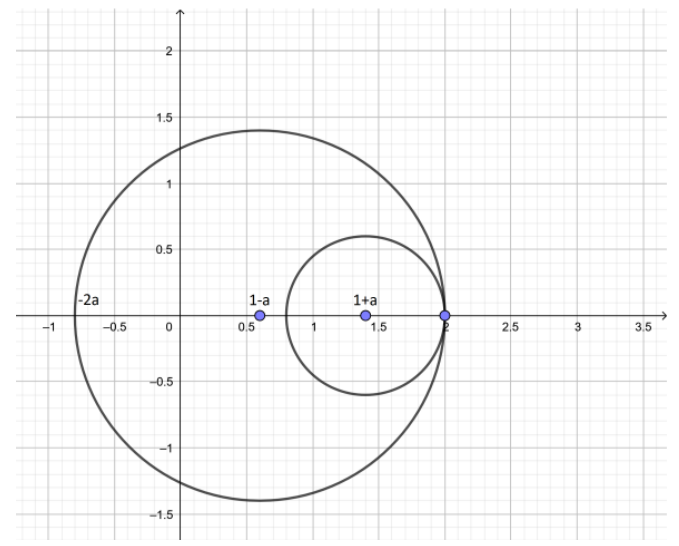

In [4]:
Image("2.png")

Переобозначим $A=1+\frac{C \tau}{h}, B=1-\frac{C \tau}{h}$ и вычислим модуль этого выражения с учётом того, что модуль дроби есть отношение модулей числителя и знаменателя:
$$
|\lambda|^{2}=\frac{(A+B \cos \alpha)^{2}+B^{2} \sin ^{2} \alpha}{(B+A \cos \alpha)^{2}+A^{2} \sin ^{2} \alpha}=1 \Rightarrow|\lambda|=1
$$
Таким образом |$\lambda$|=1 для любого $\alpha$ (спектральный критерий Неймана для данной схемы выполнен).

Это является основной причиной, по которой используется четырехточечный шаблон. Из устойчивости и аппроксимации следует сходимость.

## Исполняемый код

<IPython.core.display.Javascript object>


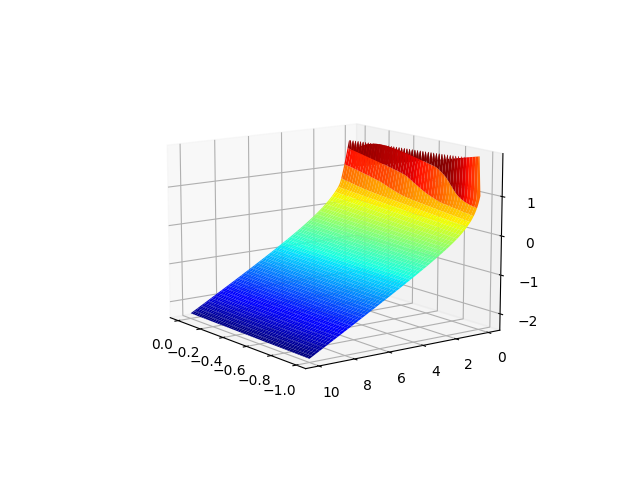

/usr/lib/python3/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

N, M = 100, 1000  # количество x, t
X, T = -1, 10

y = np.zeros((N, M), dtype=float)
x, t = np.linspace(-1,0, N), np.linspace(0, T, M) #заполняем массив числами

h = float(X)/(N-1)
τ = float(T)/(M-1)

eps = 0.01  # невязка

y[:, 0] = 1-x
y[0, :] = (2-t**2)/(4*t+2)

def p(u,t):
    return -1*(u+t*u)

def Dp(u,t):
    return -1*(2*u+t)

def f(x, a, b,t):
    return (x-a)/τ + (p(x,t)-p(b,t))/h

def Df(x,t):
    return 1/τ + Dp(x,t)/h

def solve(a, b,t):
    result = b  # начальное приближение
    d = eps+1  # чтобы цикл запустился
    while (d > eps):
        y = result
        result = y-f(y, a, b,t)/Df(y,t)
        d = abs(result-y)
    return result
%matplotlib notebook

for i in range(1, N):
    for j in range(1, M):
        y[i, j] = solve(y[i, j-1], y[i-1, j],τ*j)
fig = plt.figure()
ax = fig.gca(projection='3d')
t, x = np.meshgrid(t, x)

surf = ax.plot_surface(x, t, y, cmap='jet')